<a href="https://colab.research.google.com/github/Sedighe-Raeisi/English-Mnist/blob/main/English_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
set((train_labels))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

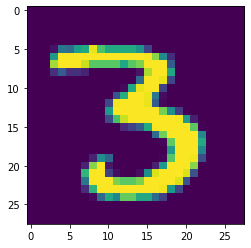

In [ ]:
plt.imshow(train_images[12]);

In [ ]:
import seaborn as sn

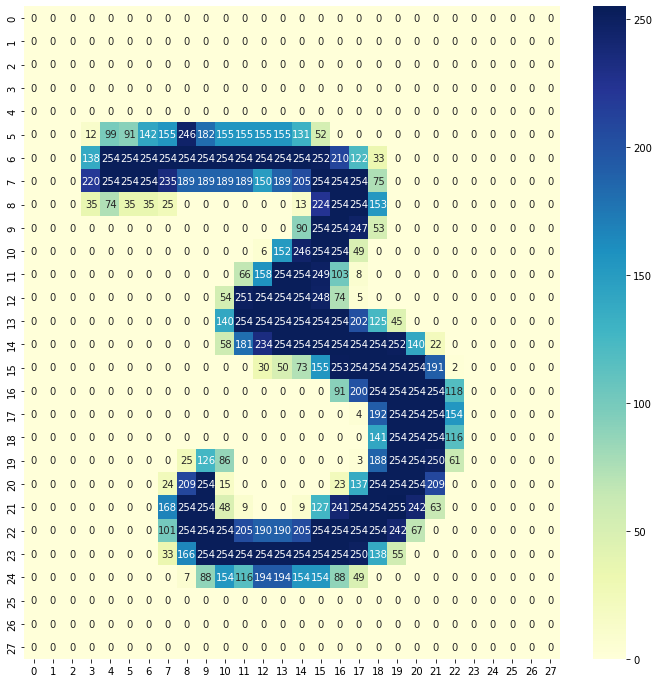

In [ ]:
plt.figure(figsize = (12,12))
a=train_images[12]
sn.heatmap(a, annot=True,fmt="d",cmap="YlGnBu")

#Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_images=train_images.reshape((60000,28,28,1))

In [ ]:
train_images.shape


(60000, 28, 28, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
train_labels=to_categorical(train_labels)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='categorical_accuracy')

In [ ]:
model_hist=model.fit(train_images,train_labels,epochs=10,validation_split=.2)

Epoch 1/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.2689 - categorical_accuracy: 0.9377 - val_loss: 0.0777 - val_categorical_accuracy: 0.9785
Epoch 2/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0687 - categorical_accuracy: 0.9789 - val_loss: 0.0689 - val_categorical_accuracy: 0.9813
Epoch 3/10
1500/1500 [==============================] - 49s 33ms/step - loss: 0.0542 - categorical_accuracy: 0.9831 - val_loss: 0.0619 - val_categorical_accuracy: 0.9831
Epoch 4/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0446 - categorical_accuracy: 0.9864 - val_loss: 0.0617 - val_categorical_accuracy: 0.9837
Epoch 5/10
1500/1500 [==============================] - 49s 32ms/step - loss: 0.0399 - categorical_accuracy: 0.9879 - val_loss: 0.0726 - val_categorical_accuracy: 0.9810
Epoch 6/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0358 - categorical_accuracy: 0.9893 - val_loss: 0.0645 - val_categoric

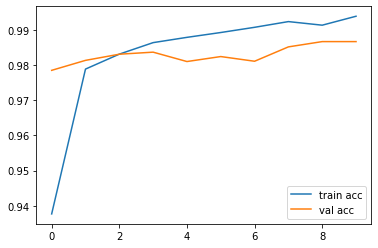

In [ ]:
plt.plot(model_hist.history['categorical_accuracy'],label='train acc')
plt.plot(model_hist.history['val_categorical_accuracy'],label='val acc')
plt.legend(loc='lower right')
plt.show()

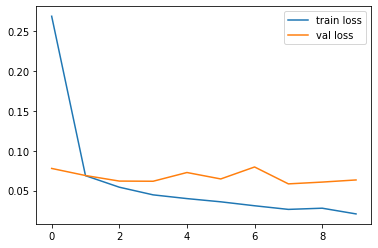

In [ ]:
plt.plot(model_hist.history['loss'],label='train loss')
plt.plot(model_hist.history['val_loss'],label='val loss')
plt.legend(loc='upper right')
plt.show();

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
test_images=test_images.reshape(10000,28,28,1)

In [ ]:
pred_labe=model.predict(test_images)

In [ ]:
pred_labe.shape

(10000, 10)

In [ ]:
test_labels=to_categorical(test_labels)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
yt=np.argmax(test_labels, axis=1)

In [ ]:
yp=np.argmax(pred_labe, axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yt,yp)

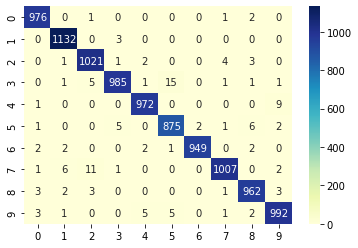

In [ ]:
sn.heatmap(cm,annot=True,fmt="d",cmap="YlGnBu")

In [ ]:
accuracy_score(yt,yp)

0.9871

In [ ]:
yt

array([7, 2, 1, ..., 4, 5, 6])

0 0


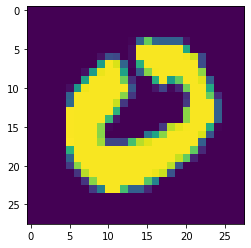

In [ ]:
i=25
print(yt[i],yp[i])
plt.imshow(test_images[i].reshape(28,28));

In [ ]:
# f1_score(yt,yp, average='macro')

0.9869878092518573

In [ ]:
train_labels[12]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(train_labels[12])

3

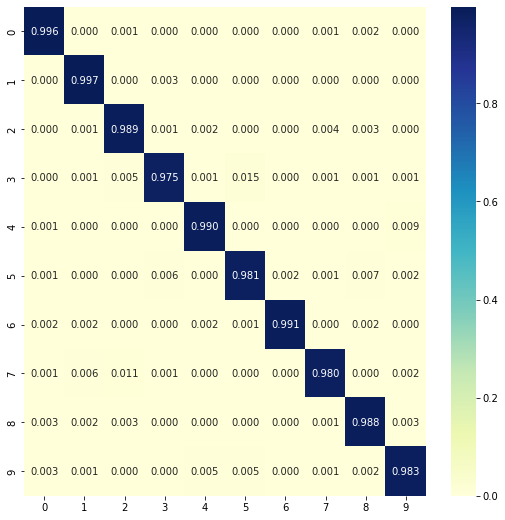

In [ ]:
plt.figure(figsize = (9,9))
cmn = confusion_matrix(yt,yp, normalize='true')
sn.heatmap(cmn,annot=True,fmt='.3f',cmap="YlGnBu");